In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

# Transformação

O intuito da transformação é o de transformar a série em uma normal, desse modo os modelos ficam mais eficientes. Os dados são referentes aos dados clássicos da companhia área Box & Jenkins. Totais mensais de passageiros de companhias aéreas internacionais, 1949 a 1960.

In [25]:
dados = pd.read_csv('AirPassengers.csv')
dados

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [26]:
serie = pd.Series(dados['#Passengers'].values, index = dados['Month'])
serie

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

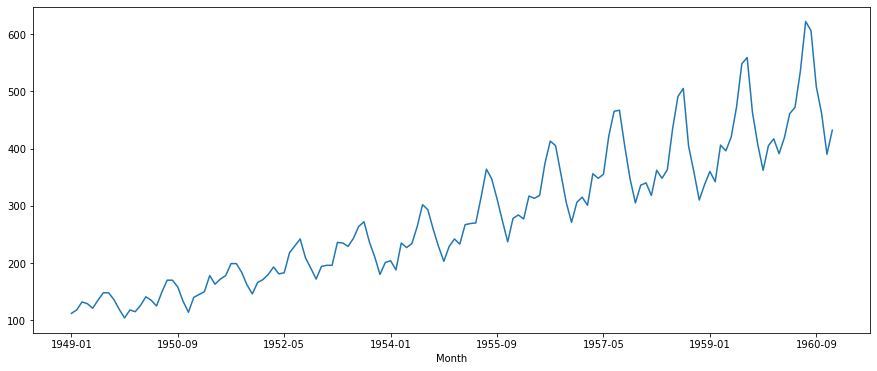

In [27]:
serie.plot()
plt.show()

Vamos analisar se essa série segue uma normalidade

In [28]:
import scipy.stats as stats

## Teste Shapiro-Wilk

Ho: P > 0.05 (Normal) <br>
Ha: P < 0.05 (Não segue uma normal)

In [29]:
e, p = stats.shapiro(serie)
print(f'Estatística do teste: {e}')
print(f'P-Valor: {p}')

Estatística do teste: 0.9519579410552979
P-Valor: 6.832739018136635e-05


Hipótese nula rejeitada, temos a afirmação de que a distribuição não segue uma normal. Vamos tentar melhorar esses dados, vamos transformar para uma log normal, ou seja, **diminuir a variância** e **melhorar a normalidade**.

In [30]:
serie2 = np.log(serie)

Novamente o teste Shapiro para a log normal

In [31]:
e, p = stats.shapiro(serie2)
print(f'Estatística do teste: {e}')
print(f'P-Valor: {p}')

Estatística do teste: 0.973236083984375
P-Valor: 0.0063744960352778435


Há uma clara melhora no P-Valor (sua normalidade), mas ainda é apontado que é uma distribuição não normal (rejeitamos a hipótese nula).

Vamos tentar fazer essa transformação agora pela raiz cúbica. No caso do Python, caso haja algum número negativo, o Python fará um tratamento nesses números como números complexos (NaN) e não como inteiros, como queremos.

In [32]:
serie3 = np.sign(serie)*abs(serie)  ** (1/3) # sinal para manter números inteiros, não complexos

In [33]:
e, p = stats.shapiro(serie3)
print(f'Estatística do teste: {e}')
print(f'P-Valor: {p}')

Estatística do teste: 0.974599301815033
P-Valor: 0.008835497312247753


C:\Users\Appleack\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


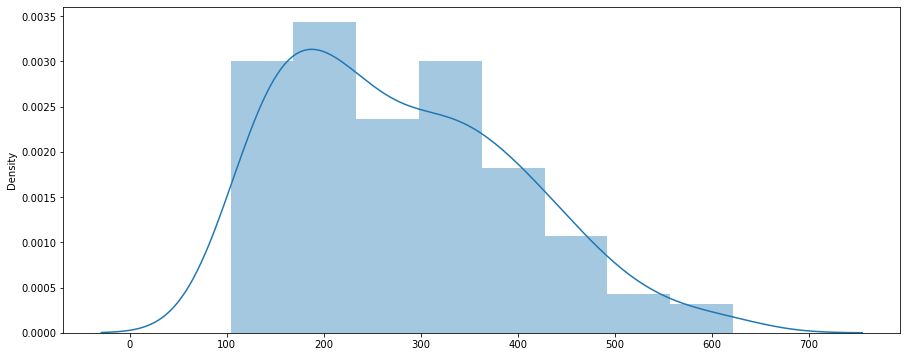

In [34]:
import seaborn as sns
sns.distplot(serie);

C:\Users\Appleack\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

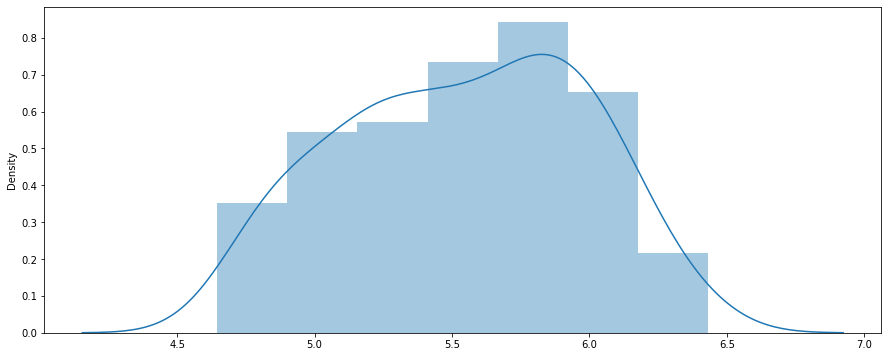

In [35]:
sns.distplot(serie2)

C:\Users\Appleack\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

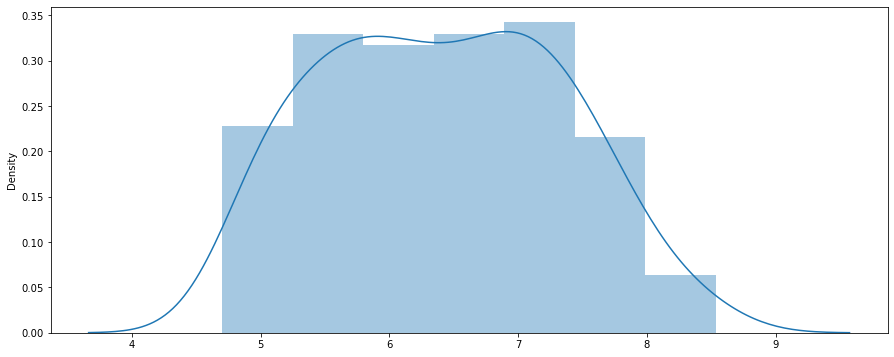

In [36]:
sns.distplot(serie3)

# Diferenciação

O objetivo da diferenciação é colocar a série em formato estacionário, ou seja, com média e variância constante ao longo do tempo. A princípio, vamos fazer o teste KPSS para verificar se a série é estacionária.

In [37]:
import statsmodels.tsa.stattools

## Teste KPSS 

Ho = não é estacionário: estatística do teste > valor crítico <br>
Ha = é estacionário: estatística do teste < valor crítico

In [39]:
kpss = statsmodels.tsa.stattools.kpss(serie3)
print(f'Estatística do teste: {kpss[0]}')
print(f'P-Valor: {kpss[1]}')
print(f'Valores críticos:')
for chave, valor in kpss[3].items():
    print(f'{chave}:{valor}')

Estatística do teste: 1.6734843825810304
P-Valor: 0.01
Valores críticos:
10%:0.347
5%:0.463
2.5%:0.574
1%:0.739


C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


A estatística do teste é maior doque o valor crítico, ou seja, aceita-se a hipótese nula e afirma-se que a série não é estacionária

## Teste Dickey Fuller

Ho = não é estacionário: estatística do teste > valor crítico <br>
Ha = é estacionário: estatística do teste < valor crítico

In [40]:
df = statsmodels.tsa.stattools.adfuller(serie3)
print(f'Estatística do teste: {df[0]}')
print(f'P-Valor: {df[1]}')
print(f'Valores críticos:')
for chave, valor in df[4].items():
    print(f'{chave}:{valor}')

Estatística do teste: -0.8100350722186367
P-Valor: 0.8161565539700504
Valores críticos:
1%:-3.4816817173418295
5%:-2.8840418343195267
10%:-2.578770059171598


Temos, novamente, que a estatística do teste é maior que o valor crítico, ou seja, a série é estacionária.

Portanto, já que temos uma série não estacionária, vamos fazer a diferenciação, isto é, transformar em uma série com média e variância constante.

In [41]:
serie4 = np.diff(serie3)

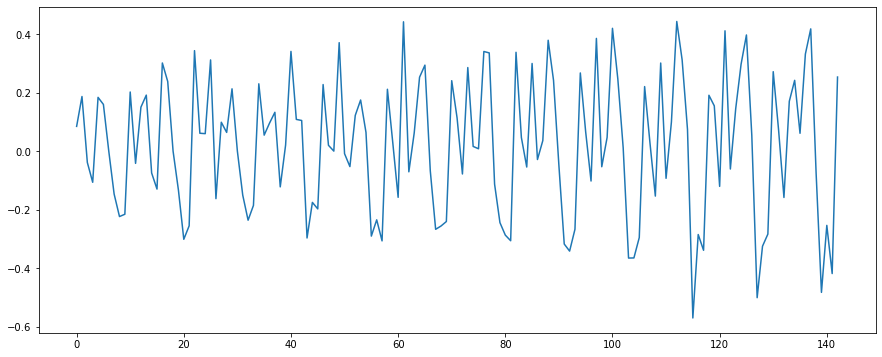

In [42]:
plt.plot(serie4)
plt.show()

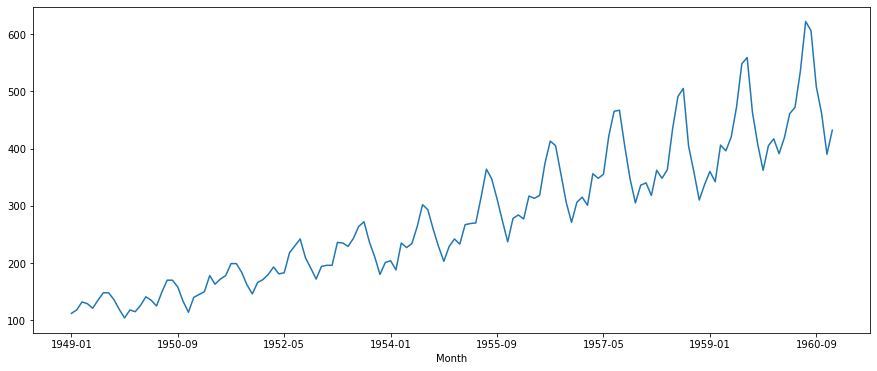

In [43]:
serie.plot()
plt.show()

In [44]:
serie_diff = serie - serie.shift() #.shift é um antecessor a ela, a série que não foi transformada

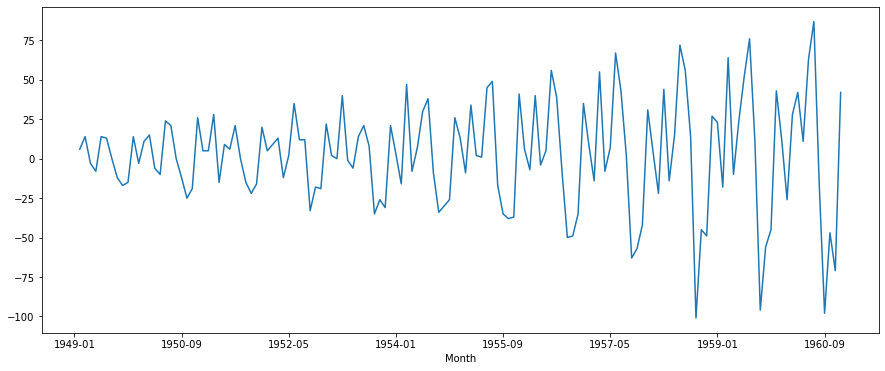

In [45]:
serie_diff.plot()
plt.show()

É a mesma série da função numpy, ambas estão transformadas, ou seja, transformadas em uma normal, provando que uma transformação pode melhorar a diferenciação. Diferenciado mantém a mesma variância e média ao longo do tempo.

## Repetindo os testes
## Teste KPSS
Ho = não é estacionário: estatística do teste > valor crítico <br>
Ha = é estacionário: estatística do teste < valor crítico

In [48]:
kpss = statsmodels.tsa.stattools.kpss(serie4)
print(f'Estatística do teste: {kpss[0]}')
print(f'P-Valor: {kpss[1]}')
print(f'Valores críticos:')
for chave, valor in kpss[3].items():
    print(f'{chave}:{valor}')

Estatística do teste: 0.026626252361993268
P-Valor: 0.1
Valores críticos:
10%:0.347
5%:0.463
2.5%:0.574
1%:0.739


C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Agora temos uma estatística do teste comprovando que a série é estacionária, ou seja, rejeitamos a hipótese nula, de que ela não é estacionária, e aceitamos a hipótese alternativa.

E se, caso ela não tenha conseguido a estacionaridade, há alguma outra coisa a ser feito? **Sim**, é possível fazer uma **diferenciação de segunda ordem**.

In [49]:
serie5 = np.diff(serie4)

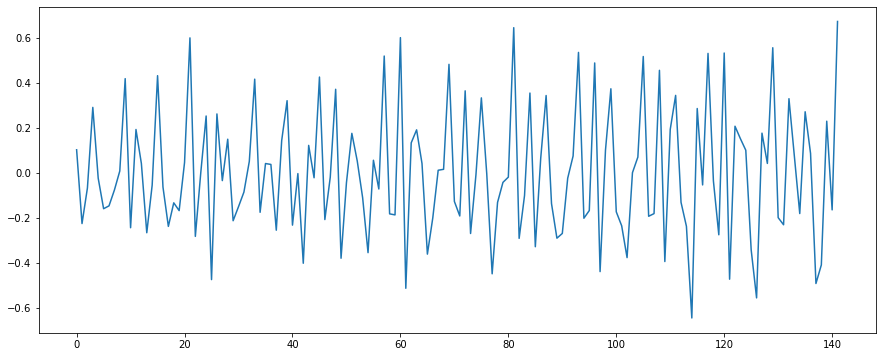

In [50]:
plt.plot(serie5)
plt.show()